# Evaluation examples

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

Detecting 1 CUDA device(s).
2023-08-27 14:39:36,127 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:41] - INFO: cffi mode is CFFI_MODE.ANY
2023-08-27 14:39:36,134 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:218] - INFO: R home found: C:\Program Files\R\R-4.3.1
2023-08-27 14:39:36,160 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\rinterface_lib\embedded.py[line:20] - INFO: Default options to initialize R: rpy2, --quiet, --no-save
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
%autoreload 2
# Node names from 0 to 19
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']#, '10', '11', '12', '13', '14', '15', '16', '17', '18','19']
node_names = None
#seed = 12343
simulation = Simulator(n_nodes = 10, n_edges = 20, n_clusters = 3, seed = 123, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()

2023-08-27 14:39:37,156 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [5]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X1'], 'C2': ['X2', 'X5', 'X10', 'X7', 'X9', 'X3', 'X8'], 'C3': ['X6', 'X4']}
[('C1', 'C2'), ('C1', 'C3'), ('C2', 'C3')]


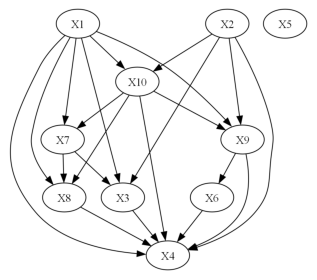

In [6]:
cluster_dag.true_dag.draw_pydot_graph()

In [7]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [8]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

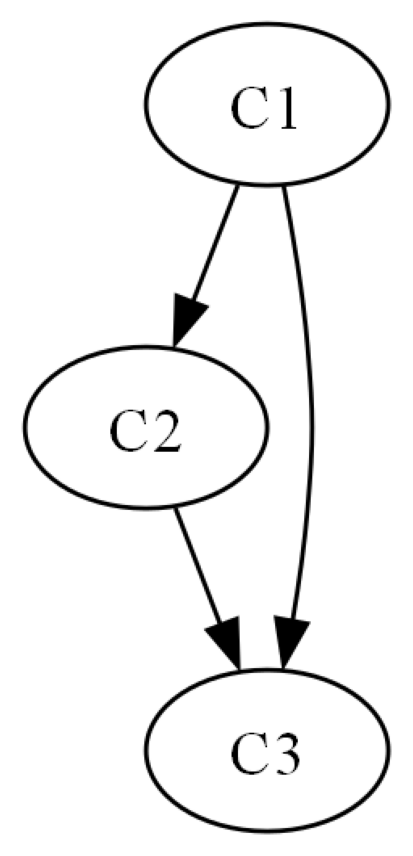

In [9]:
cluster_dag.draw_cluster_graph()

In [66]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.9, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()

C3 phase, Depth=6, working on node 5: 100%|██████████| 2/2 [00:00<00:00, 80.10it/s, duration: 0.51sec]


Duration of algorithm was 1.15sec


In [11]:
cluster_dag.true_dag.to_nx_graph()
# from clustercausal.algorithms.OldClusterPC import ClusterPC
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.01, \
                  indep_test = "d_separation", \
                  verbose = False, show_progress=True, true_dag = cluster_dag.true_dag.nx_graph)
est_graph_dsep = cluster_pc.run()

C3 phase, Depth=8, working on node 5: 100%|██████████| 2/2 [00:00<00:00, 476.44it/s, duration: 0.34sec]

Duration of algorithm was 0.53sec


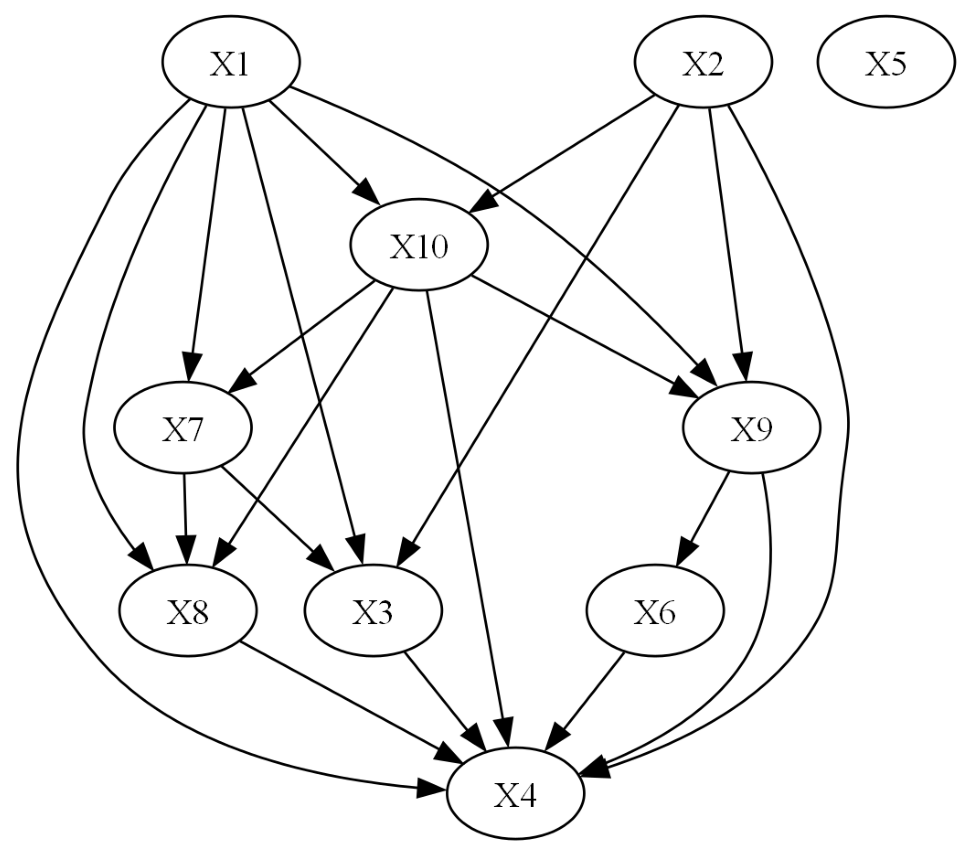

In [12]:
cluster_dag.true_dag.draw_pydot_graph()

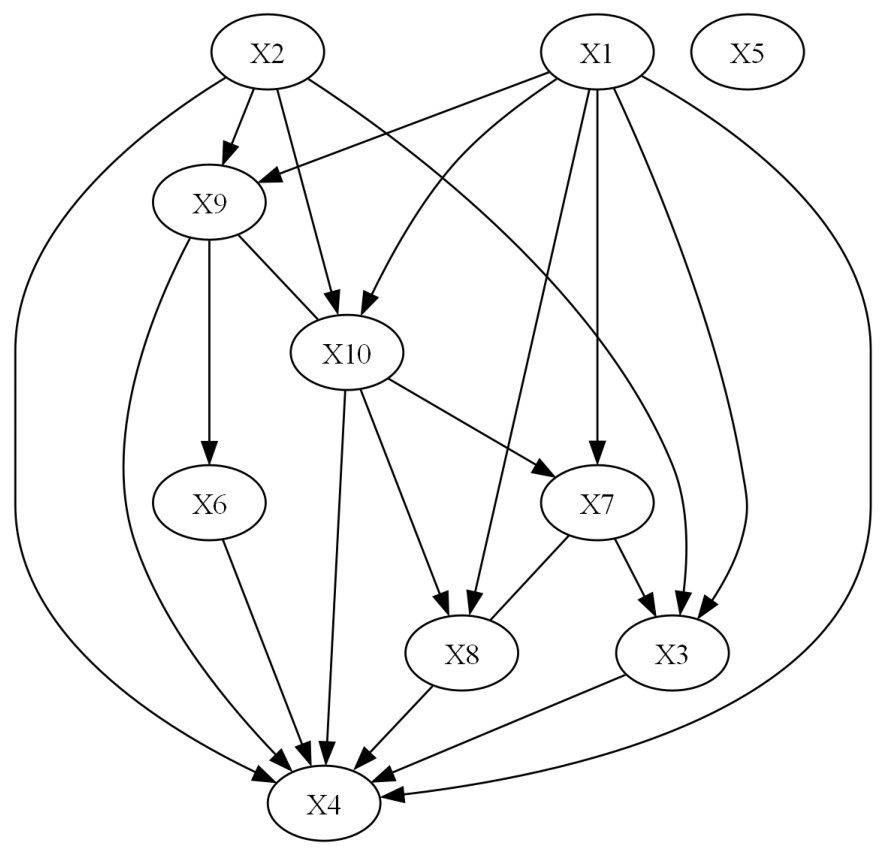

In [13]:
est_graph_dsep.draw_pydot_graph()

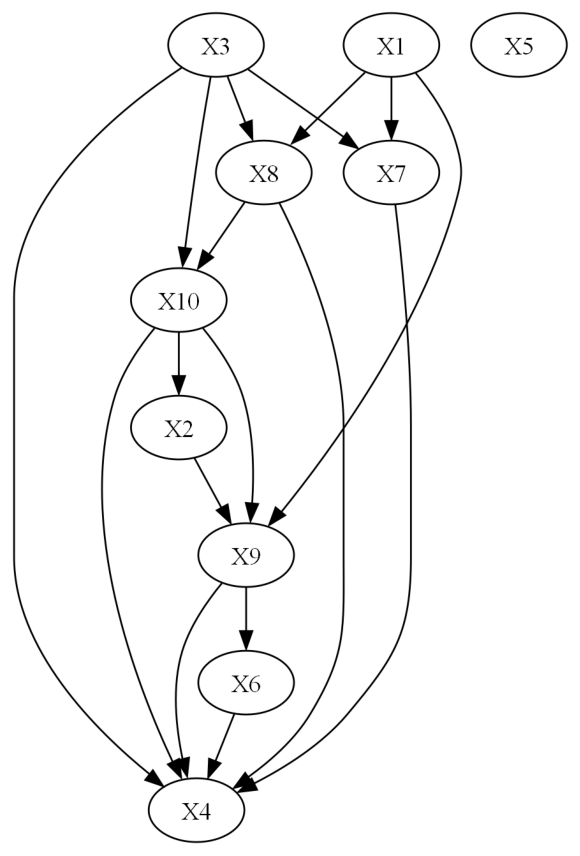

In [14]:
est_graph.draw_pydot_graph()

In [39]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd, sid = evaluation.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)
print("SID: ", sid)

Adjacency confusion:  {'true_positive': 17, 'false_positive': 8, 'false_negative': 4, 'true_negative': 16, 'precision': 0.68, 'recall': 0.8095238095238095, 'f1_score': 0.7391304347826089}
Arrow confusion:  {'true_positive': 14.0, 'false_positive': 10.0, 'false_negative': 7.0, 'true_negative': 69.0, 'precision': 0.5833333333333334, 'recall': 0.6666666666666666, 'f1_score': 0.6222222222222222, 'true_positive_ce': 14.0, 'false_positive_ce': 3.0, 'false_negative_ce': 3.0, 'true_negative_ce': 80.0, 'precision_ce': 0.8235294117647058, 'recall_ce': 0.8235294117647058, 'f1_score_ce': 0.8235294117647058}
SHD:  15
SID:  {'sid_lower': None}


In [16]:
evaluation_dsep = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph_dsep.G)
adjacency_confusion, arrow_confusion, shd, sid = evaluation_dsep.get_causallearn_metrics(sid = True)
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)
print("SID: ", sid)

Adjacency confusion:  {'true_positive': 21, 'false_positive': 0, 'false_negative': 0, 'true_negative': 24, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Arrow confusion:  {'true_positive': 19.0, 'false_positive': 0.0, 'false_negative': 2.0, 'true_negative': 79.0, 'precision': 1.0, 'recall': 0.9047619047619048, 'f1_score': 0.9500000000000001, 'true_positive_ce': 19.0, 'false_positive_ce': 0.0, 'false_negative_ce': 2.0, 'true_negative_ce': 79.0, 'precision_ce': 1.0, 'recall_ce': 0.9047619047619048, 'f1_score_ce': 0.9500000000000001}
SHD:  0
SID:  {'sid_lower': 0, 'sid_upper': 13}


In [64]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.9, verbose=False, node_names=node_names)

Depth=6, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 370.58it/s]


In [41]:
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid  = evaluation_causallearn.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
# print("SID", cl_sid)

Adjacency confusion:  {'true_positive': 16, 'false_positive': 7, 'false_negative': 5, 'true_negative': 17, 'precision': 0.6956521739130435, 'recall': 0.7619047619047619, 'f1_score': 0.7272727272727272}
Arrow confusion:  {'true_positive': 6.0, 'false_positive': 15.0, 'false_negative': 15.0, 'true_negative': 64.0, 'precision': 0.2857142857142857, 'recall': 0.2857142857142857, 'f1_score': 0.2857142857142857, 'true_positive_ce': 6.0, 'false_positive_ce': 9.0, 'false_negative_ce': 10.0, 'true_negative_ce': 75.0, 'precision_ce': 0.4, 'recall_ce': 0.375, 'f1_score_ce': 0.38709677419354843}
SHD:  21


In [19]:
causallearn_cg_dsep = pc(cluster_dag.data, alpha = 0.01, indep_test = 'd_separation',  verbose=False, node_names=node_names, true_dag = cluster_dag.true_dag.nx_graph)

Depth=6, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1076.98it/s]


In [20]:
evaluation_causallearn_dsep = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg_dsep.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid = evaluation_causallearn_dsep.get_causallearn_metrics(sid = True)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
print("SID", cl_sid)

Adjacency confusion:  {'true_positive': 21, 'false_positive': 0, 'false_negative': 0, 'true_negative': 24, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Arrow confusion:  {'true_positive': 19.0, 'false_positive': 0.0, 'false_negative': 2.0, 'true_negative': 79.0, 'precision': 1.0, 'recall': 0.9047619047619048, 'f1_score': 0.9500000000000001, 'true_positive_ce': 19.0, 'false_positive_ce': 0.0, 'false_negative_ce': 2.0, 'true_negative_ce': 79.0, 'precision_ce': 1.0, 'recall_ce': 0.9047619047619048, 'f1_score_ce': 0.9500000000000001}
SHD:  0
SID {'sid_lower': 0, 'sid_upper': 13}


In [21]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

True
True
True


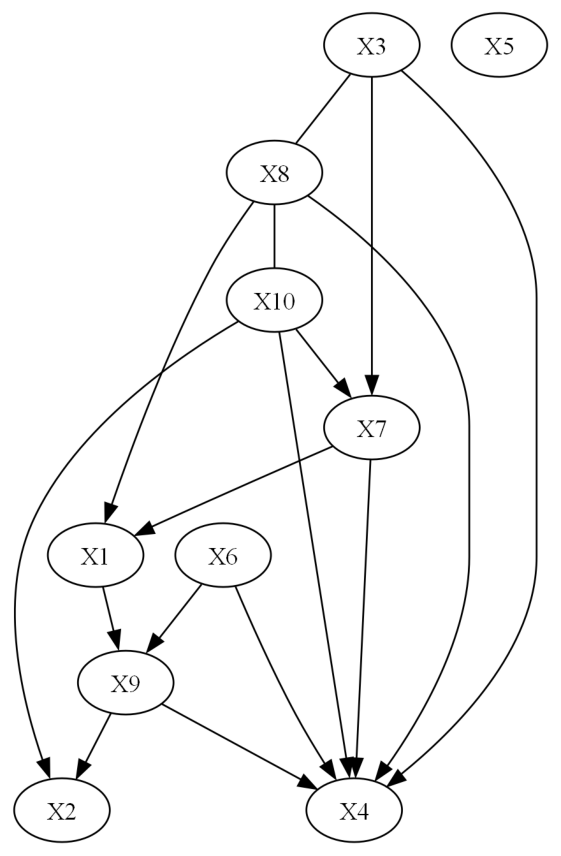

In [25]:
causallearn_cg.draw_pydot_graph()

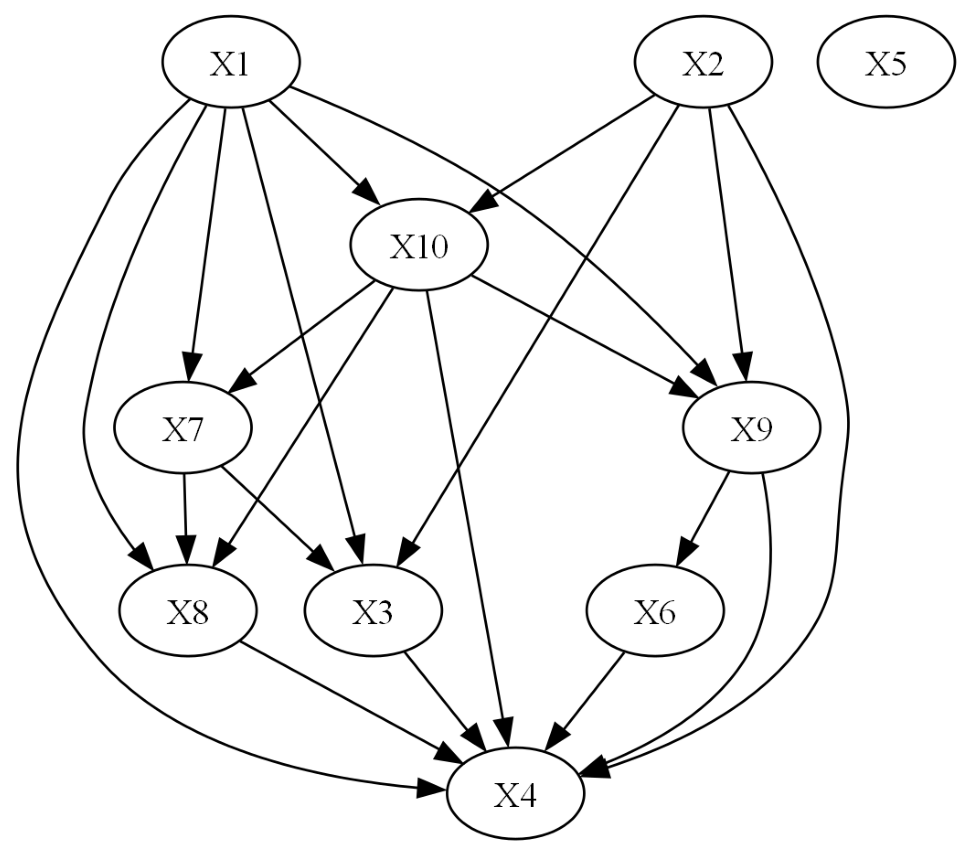

In [26]:
cluster_dag.true_dag.draw_pydot_graph()

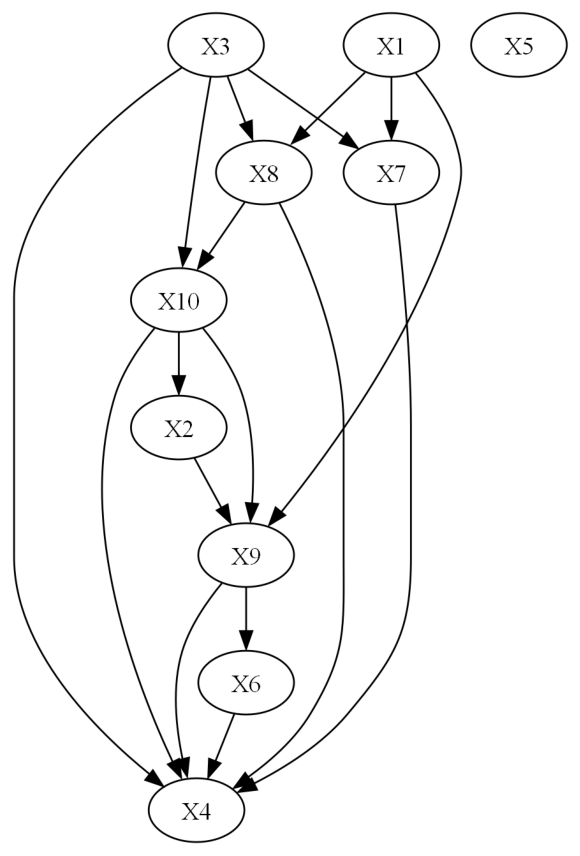

In [27]:
est_graph.draw_pydot_graph()